<a href="https://colab.research.google.com/github/enoveri/Deep-Learning/blob/CNNs/Waste_pynb_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d alistairking/recyclable-and-household-waste-classification



Dataset URL: https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification
License(s): MIT
 99% 913M/920M [00:08<00:00, 135MB/s]
100% 920M/920M [00:08<00:00, 108MB/s]


In [2]:
#unzipping the recyclable-and-household-waste-classification.zip file
from zipfile import ZipFile
from pathlib import Path

data_path = Path("data")
if data_path.is_dir():
  print(f"{data_path} directory already exists")
else:
  data_path.mkdir(parents=True, exist_ok= True)
  #Unzipping file
  dataset = '/content/recyclable-and-household-waste-classification.zip'
  with ZipFile(dataset,'r') as zip:
    zip.extractall(data_path)
    print('The dataset is extracted')

The dataset is extracted


In [3]:
#Visualizing the directory structure
# from pathlib import Path
# import shutil
# original_path_list = data_path.glob("**/*.png")
# for path in original_path_list:
#   print(path)
#   parent_dir = path.parents[1]

#   new_path = parent_dir / path.name
#   print(new_path)
#   shutil.move(str(path),str(new_path))
#   if not any(parent_dir.iterdir()):
#     parent_dir.rmdir()



In [4]:
import shutil
for path in data_path.rglob("*"):
  if path.name == "real_world" or path.name == "default":
    for file_in_path in path.iterdir():
      shutil.move(str(file_in_path),str(path.parent/file_in_path.name))
    path.rmdir()

In [5]:
#function to extract classes
def get_classes():
  classes = []
  for path in data_path.rglob("**/*.png"):
    if path.parent.name not in classes:
      classes.append(path.parent.name)
  class_idx = {classes[i]:i for i in range(len(classes))}
  return classes , class_idx

classes, class_idx =get_classes()


In [6]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
import random

images = list(data_path.rglob("**/*.png"))
random.shuffle(images)
labels = [class_idx[str(path.parent.name)] for path in images]

In [7]:
from torch.utils.data import Dataset
from PIL import Image
class WasteData(Dataset):
    def __init__(self, images, labels, data, transforms=None):
        super().__init__()
        self.images = images
        self.labels= labels
        self.transforms = transforms
        # X_train, X_test, y_train, y_test = train_test_split(self.images, self.labels, test_size=0.2, random_state=42)
        # if data == "train":
        #   self.images = X_train
        #   self.labels = y_train
        # elif data == "test":
        #   self.images = X_test
        #   self.labels = y_test
        split = 0.75
        split_idx = int(len(self.images) * split)
        if data == "train":
            self.images = self.images[:split_idx]
            self.labels = self.labels[:split_idx]
        else:
          self.images = self.images[split_idx:]
          self.labels = self.labels[split_idx:]

    def load_images(self,idx):
        try:
            img = Image.open(self.images[idx])
            return img
        except Exception as e:
            print(f"Error Occurred, Error code {e}")


    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):

        img = self.load_images(index)
        label = self.labels[index]

        if self.transforms:
            return self.transforms(img),label
        else:
            return img, label





In [8]:
#tranforms
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])


In [9]:
training_data = WasteData(images,labels,"train",train_transforms)
test_data = WasteData(images,labels,"test", test_transforms)

In [10]:
training_data.__getitem__(0)

(tensor([[[-1.0000, -1.0000, -1.0000,  ...,  0.8118,  0.8118,  0.8118],
          [-1.0000, -1.0000, -1.0000,  ...,  0.8118,  0.8118,  0.8118],
          [-1.0000, -1.0000, -1.0000,  ...,  0.8118,  0.8118,  0.8118],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],
 
         [[-1.0000, -1.0000, -1.0000,  ...,  0.8118,  0.8118,  0.8118],
          [-1.0000, -1.0000, -1.0000,  ...,  0.8118,  0.8118,  0.8118],
          [-1.0000, -1.0000, -1.0000,  ...,  0.8118,  0.8118,  0.8118],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],
 
         [[-1.0000, -1.0000, -1.0000,  ...,  0.8118,  0.8118,  0.8118],
          [-1.0000, -1.0000,

In [11]:
image, label = next(iter(test_data))

In [12]:
test_data.__len__()

1875

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
def plot_(data,classes,rows,cols,labels: str = None):
    figure = plt.figure(figsize=(12, 8))
    cols, rows = rows, cols
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        try:
            img, label = data.__getitem__(sample_idx)
            plt.title(classes[label])
        except :
            img = data[sample_idx]
            label = labels[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.axis("off")
        try:
            plt.imshow(np.asarray(img), cmap="gray")
        except:
            plt.imshow(img.permute(1, 2, 0))
    plt.show()

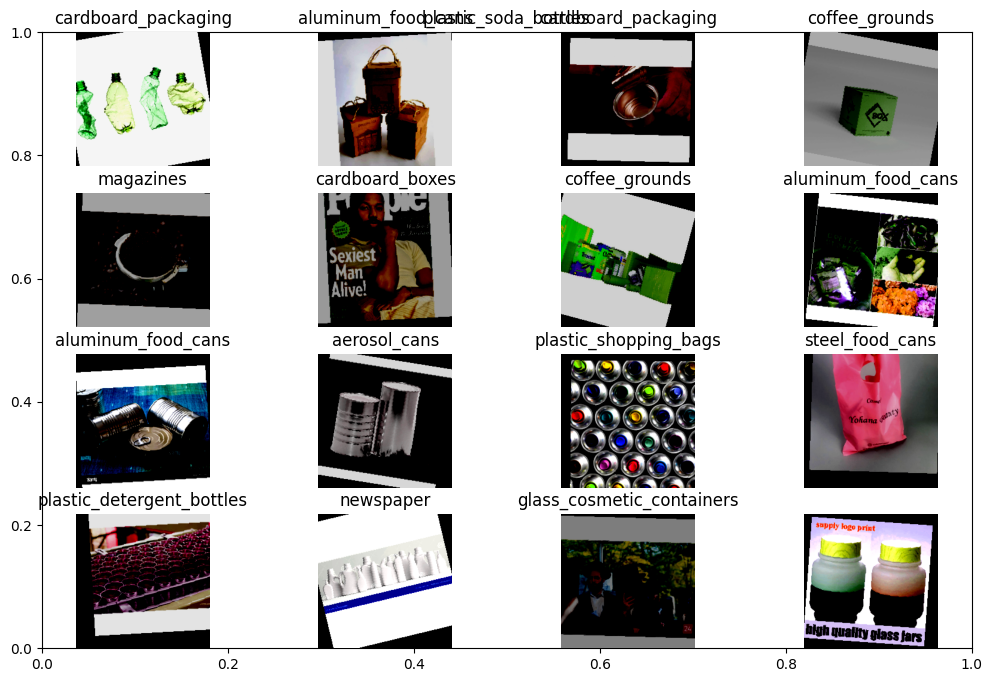

In [14]:
plot_(training_data,classes,4,4)

In [15]:
#DataLoader
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_DataLoader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
    )
test_DataLoader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [16]:
#Device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [17]:
from sklearn.metrics import accuracy_score
def train_(model,dataloader,loss_fn,optimizer):
    model.train()
    train_loss = 0
    train_acc = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += accuracy_score(y.cpu(), y_pred_class.cpu(), normalize=True)
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [18]:
def test_(model,dataloader,loss_fn):
    model.eval()
    test_loss = 0
    test_acc = 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
            test_acc += accuracy_score(y.cpu(), y_pred_class.cpu(), normalize=True)
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [19]:
from google.colab import drive
drive.mount('/content/drive')

model_save_path = Path("/content/drive/MyDrive/Wasteclassification Models")

Mounted at /content/drive


In [20]:
#create folder for path if it does not exist

model_save_path.mkdir(parents=True, exist_ok=True)

In [21]:
def save_model(model):
  best_model_path = model_save_path / f"{model.__class__.__name__}.pth"
  torch.save(model.state_dict(), best_model_path)

In [22]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
import torch.nn as nn
training_time = {}


def train_model(model:nn.Module,train_dataset, test_dataset, optimizer,loss_fn,epochs,display_epochs):
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    model = model.to(device)
    epochs = epochs
    start_ = timer()
    for epoch in tqdm(range(epochs)):

        print("Training")
        train_loss, train_acc = train_(model,train_DataLoader,loss_func, optimizer)
        print("Testing")
        test_loss, test_acc = test_(model,test_DataLoader,loss_func)
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        if epoch % display_epochs == 0:
            print(f"Epoch: {epoch} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")
    stop = timer()
    time_ = stop-start_
    training_time[model.__class__.__name__]= time_
    print(f"Total Training Time: {time_}")
    return results

In [23]:
def plot_loss_curves(results):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

In [24]:

def image_label_lists(data,samples:int):
    """
    Extracts a random sample of 9 images and their corresponding labels from a dataset.

    Args:
        data (list): A dataset containing tuples of (image, label).
        samples (integer): the number of images

    Returns:
        tuple: A tuple containing two lists:
            - images (list): A list of 9 randomly selected images.
            - labels (list): A list of labels corresponding to the selected images.
    """
    import random
    images = []
    labels = []
    for  i in range(samples):
        image, label = random.choice(data)
        images.append(image)
        labels.append(label)
    return images, labels



# make predictions
def predictions(model:nn.Module,data:list ):
    """
    Makes predictions on a list of images using a given model.

    Args:
        model (nn.Module): The trained PyTorch model for making predictions.
        data (list): A list of image tensors to predict on. Each image should be a torch.Tensor
                     of shape (C, H, W) or a batch of images of shape (N, C, H, W).

    Returns:
        tuple: A tuple containing:
            - images (list): The input list of image tensors.
            - predictions (list): A list of predicted labels for each image, with predictions
                                  detached to the CPU.
    """
    images = data
    predictions = []
    model.eval()
    with torch.inference_mode():
        for image in images:
            image= image.to(device)
            try:
                prediction = model(image)
            except:
                prediction = model(image.unsqueeze(0))
            pred_label = torch.argmax(prediction, dim = 1)
            predictions.append(pred_label.cpu())
    return images, predictions

def denormalize(image: torch.Tensor, mean: list, std: list) -> torch.Tensor:
    """
    Reverses the normalization of an image tensor using the specified mean and standard deviation.

    Args:
        image (torch.Tensor): The normalized image tensor of shape (C, H, W).
        mean (list): List of mean values for each channel, typically [0.485, 0.456, 0.406] for ImageNet.
        std (list): List of standard deviation values for each channel, typically [0.229, 0.224, 0.225] for ImageNet.

    Returns:
        torch.Tensor: The denormalized image tensor of the same shape as the input.
    """
    mean=torch.tensor(mean).view(3,1,1)
    std= torch.tensor(std).view(3,1,1)
    return image*std + mean
def plot_(model:nn.Module,data:list,true_labels, samples:int=None):
    """
    Plots predictions alongside their corresponding true labels for a given model.

    Args:
        model (nn.Module): The trained PyTorch model for making predictions.
        data (list): A list of image tensors to predict on.
        true_labels (list): A list of true labels corresponding to the data.
        classes (list): A list of class names.
        samples (int, optional): The number of images to display. Defaults to 9.

    Returns:
        None
    """
    images, preds = predictions(model,data)
    plt.figure(figsize=(12,8))
    rows = 3
    cols = 3
    for i in range(len(images)):
        plt.subplot(rows, cols,i+1)
        image = images[i]
        image = denormalize(image, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]).permute(1,2,0)
        if true_labels[i]==preds[i]:
            plt.title(f"Actual:{classes[true_labels[i]]}\nPred:{classes[preds[i]]}", color ="green")
        else:
            plt.title(f"Actual:{classes[true_labels[i]]}\nPred:{classes[preds[i]]}", color ="red")
        plt.axis("off")
        plt.imshow(image)
        plt.tight_layout()
    plt.show()



In [68]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def metrics(model, data, classes, samples=9):
    """
    Computes and displays classification metrics for a model on a dataset.

    Args:
        model (nn.Module): The trained model to evaluate.
        data (list): Dataset containing image-label pairs.
        classes (list): List of class names.
        samples (int): Number of samples to evaluate. Defaults to 9.

    Returns:
        None
    """
    # Extract images and labels
    images, labels = image_label_lists(data, samples=samples)
    y_pred = predictions(model, images)[1]  # Get predicted labels

    # Classification Report
    def classification_report_fn():
        print("\nClassification Report:")
        print(classification_report(labels, y_pred, target_names=classes))

    # Confusion Matrix
    def confusion_matrix_fn():

      cm = confusion_matrix(labels, y_pred)
      fig, ax = plt.subplots(figsize=(15, 15))
      disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
      disp.plot(ax= ax, cmap=plt.cm.Blues)
      plt.title("Confusion Matrix")
      plt.show()

    # Execute the functions
    classification_report_fn()
    confusion_matrix_fn()


In [63]:
classes

['magazines',
 'office_paper',
 'plastic_soda_bottles',
 'aerosol_cans',
 'clothing',
 'aluminum_food_cans',
 'styrofoam_food_containers',
 'cardboard_packaging',
 'plastic_cup_lids',
 'shoes',
 'steel_food_cans',
 'glass_beverage_bottles',
 'food_waste',
 'cardboard_boxes',
 'glass_food_jars',
 'plastic_water_bottles',
 'disposable_plastic_cutlery',
 'newspaper',
 'plastic_shopping_bags',
 'plastic_detergent_bottles',
 'plastic_trash_bags',
 'coffee_grounds',
 'paper_cups',
 'eggshells',
 'plastic_food_containers',
 'styrofoam_cups',
 'aluminum_soda_cans',
 'glass_cosmetic_containers',
 'plastic_straws',
 'tea_bags']

In [26]:
#Building our baseline Model
import torch.nn as nn
class TinnyVGGModelV1(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape) -> None:
      super().__init__()
      self.conv_block1 = nn.Sequential(
          nn.Conv2d(
                    in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride= 1,
                    padding = 0),
          nn.ReLU(),
          nn.Conv2d(
                    in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride= 1,
                    padding = 0),
          nn.ReLU(),
          nn.MaxPool2d(2,2)
      )
      self.conv_block2 = nn.Sequential(
          nn.Conv2d(
                    in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride= 1,
                    padding = 0),
          nn.ReLU(),
          nn.Conv2d(
                    in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride= 1,
                    padding = 0),
          nn.ReLU(),
          nn.MaxPool2d(2,2)
      )
      self.activation_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                28090, output_shape
            )
        )

  def forward(self, input):
      x= self.conv_block1(input)
      # print(x.shape)
      x= self.conv_block2(x)

      x= self.activation_layers(x)

      return x

torch.manual_seed(42)
torch.cuda.manual_seed(42)
tinyVGG = TinnyVGGModelV1(3, 10,len(classes)).to(device)

#optimizer  and loss
tinnyVGG_optimizer = torch.optim.Adam(params= tinyVGG.parameters(), lr = 0.001)
loss_func = nn.CrossEntropyLoss()
import torch.nn.functional as F
class CustomCNNModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=3,out_channels = 16,kernel_size = 3)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels = 64,kernel_size = 3)
        self.conv3 = nn.Conv2d(in_channels=64,out_channels = 128,kernel_size = 3)

        self.l1 = nn.Linear(in_features=86528,out_features = 64)
        self.l23 = nn.Linear(in_features = 64,out_features=len(classes))

    def forward(self, x):

        # convultion layers
        x = F.relu(self.conv1(x))
        x = nn.MaxPool2d(kernel_size=2, stride=2)(x)
        x= self.conv2(x)
        # print(x.shape)
        x = F.relu(x)
        x = nn.MaxPool2d(kernel_size=2, stride=2)(x)
        x= self.conv3(x)
        # print(x.shape)
        x = F.relu(x)
        x = nn.MaxPool2d(kernel_size=2, stride=2)(x)

        # flatten
        # x = x.view(x.size(0), -1)
        x = torch.flatten(x, start_dim=1)

        # linear layers
        x = F.relu(self.l1(x))
        x = self.l23(x)

        return x

torch.manual_seed(42)
torch.cuda.manual_seed(42)
CNN_model = CustomCNNModel().to(device)

#optimizer  and loss
CustomCNN_optimizer = torch.optim.Adam(params= CNN_model.parameters(), lr = 0.001)
loss_func = nn.CrossEntropyLoss()

In [27]:
class CustomCNNModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=3,out_channels = 16,kernel_size = 3)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels = 64,kernel_size = 3)
        self.conv3 = nn.Conv2d(in_channels=64,out_channels = 128,kernel_size = 3)

        self.l1 = nn.Linear(in_features=86528,out_features = 64)
        self.l23 = nn.Linear(in_features = 64,out_features=len(classes))

    def forward(self, x):

        # convultion layers
        x = F.relu(self.conv1(x))
        x = nn.MaxPool2d(kernel_size=2, stride=2)(x)
        x= self.conv2(x)
        # print(x.shape)
        x = F.relu(x)
        x = nn.MaxPool2d(kernel_size=2, stride=2)(x)
        x= self.conv3(x)
        # print(x.shape)
        x = F.relu(x)
        x = nn.MaxPool2d(kernel_size=2, stride=2)(x)

        # flatten
        # x = x.view(x.size(0), -1)
        x = torch.flatten(x, start_dim=1)

        # linear layers
        x = F.relu(self.l1(x))
        x = self.l23(x)

        return x

torch.manual_seed(42)
torch.cuda.manual_seed(42)
CNN_model = CustomCNNModel().to(device)

#optimizer  and loss
CustomCNN_optimizer = torch.optim.Adam(params= CNN_model.parameters(), lr = 0.001)
loss_func = nn.CrossEntropyLoss()

In [28]:
#MobileNetV3 large
from torchvision.models import mobilenet_v3_large
torch.manual_seed(42)
torch.cuda.manual_seed(42)
mobileNetLarge_model = mobilenet_v3_large(pretrained=True)
mobileNetLarge_model.classifier[3] = nn.Linear(mobileNetLarge_model.classifier[3].in_features,len(classes))

#optimizer  and loss
mobileNetLarge_optimizer = torch.optim.Adam(params= mobileNetLarge_model.parameters(), lr = 0.001)
loss_func = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 62.2MB/s]


In [29]:
from torchvision.models import efficientnet_v2_s
torch.manual_seed(42)
torch.cuda.manual_seed(42)
efficientNet_model = efficientnet_v2_s(pretrained=True)
efficientNet_model.to(device)
efficientNet_model.classifier[1]= nn.Linear(efficientNet_model.classifier[1].in_features, len(classes))

efficientNet_model_optimizer = torch.optim.Adam(params=efficientNet_model.parameters(), lr = 0.001)
loss_func = nn.CrossEntropyLoss()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 182MB/s]


In [55]:
#Model comparison
import pandas as pd
import seaborn as sns
def model_eval(model, optimizer, loss_func):
    model.eval()
    eval_loss, eval_acc = 0, 0
    with torch.no_grad():
        for x, y in test_DataLoader:
            x, y = x.to(device), y.to(device)
            model = model.to(device)
            pred = model(x)
            loss = loss_func(pred,y)
            eval_loss +=loss
            eval_acc += accuracy_score(y.cpu().numpy(), torch.argmax(pred,dim =1).cpu().numpy())
        eval_loss /= len(test_DataLoader)
        eval_acc /= len(test_DataLoader)

    return {
        "Model": model.__class__.__name__,
        "Loss":eval_loss.item(),
        "Acc":eval_acc
    }

def evaluate():
    mobileNetLarge_model_results = model_eval(mobileNetLarge_model, mobileNetLarge_optimizer,loss_func)

    tinyVGG_results = model_eval(tinyVGG,tinnyVGG_optimizer,loss_func)

    CNN_model_results = model_eval(CNN_model,CustomCNN_optimizer, loss_func)

    efficientNet_results = model_eval(efficientNet_model,efficientNet_model_optimizer, loss_func)

    df = pd.DataFrame([mobileNetLarge_model_results, tinyVGG_results,CNN_model_results, efficientNet_results])

    sns.barplot(x='Acc', y='Model' , data= df,orient='h')
    plt.xlabel("Accuracy")
    plt.ylabel("Model name")
    plt.title('Model Accuracy')
    plt.show()

    df2 = pd.DataFrame([training_time])
    print(df)

    print("Ranking according to training time")
    print(df2)



  0%|          | 0/30 [00:00<?, ?it/s]

Training
Testing
Epoch: 0 | train_loss: 1.9922 | train_acc: 0.4461 | test_loss: 1.4648 | test_acc: 0.6081
Training
Testing
Epoch: 1 | train_loss: 1.1419 | train_acc: 0.6470 | test_loss: 0.7292 | test_acc: 0.7589
Training
Testing
Epoch: 2 | train_loss: 0.8100 | train_acc: 0.7355 | test_loss: 0.6257 | test_acc: 0.8384
Training
Testing
Epoch: 3 | train_loss: 0.5844 | train_acc: 0.8117 | test_loss: 0.2986 | test_acc: 0.8972
Training
Testing
Epoch: 4 | train_loss: 0.4365 | train_acc: 0.8591 | test_loss: 0.3629 | test_acc: 0.9034
Training
Testing
Epoch: 5 | train_loss: 0.3089 | train_acc: 0.9046 | test_loss: 0.2033 | test_acc: 0.9364
Training
Testing
Epoch: 6 | train_loss: 0.2636 | train_acc: 0.9191 | test_loss: 0.1275 | test_acc: 0.9498
Training
Testing
Epoch: 7 | train_loss: 0.2233 | train_acc: 0.9301 | test_loss: 0.0966 | test_acc: 0.9723
Training
Testing
Epoch: 8 | train_loss: 0.2005 | train_acc: 0.9403 | test_loss: 0.0748 | test_acc: 0.9751
Training
Testing
Epoch: 9 | train_loss: 0.1717

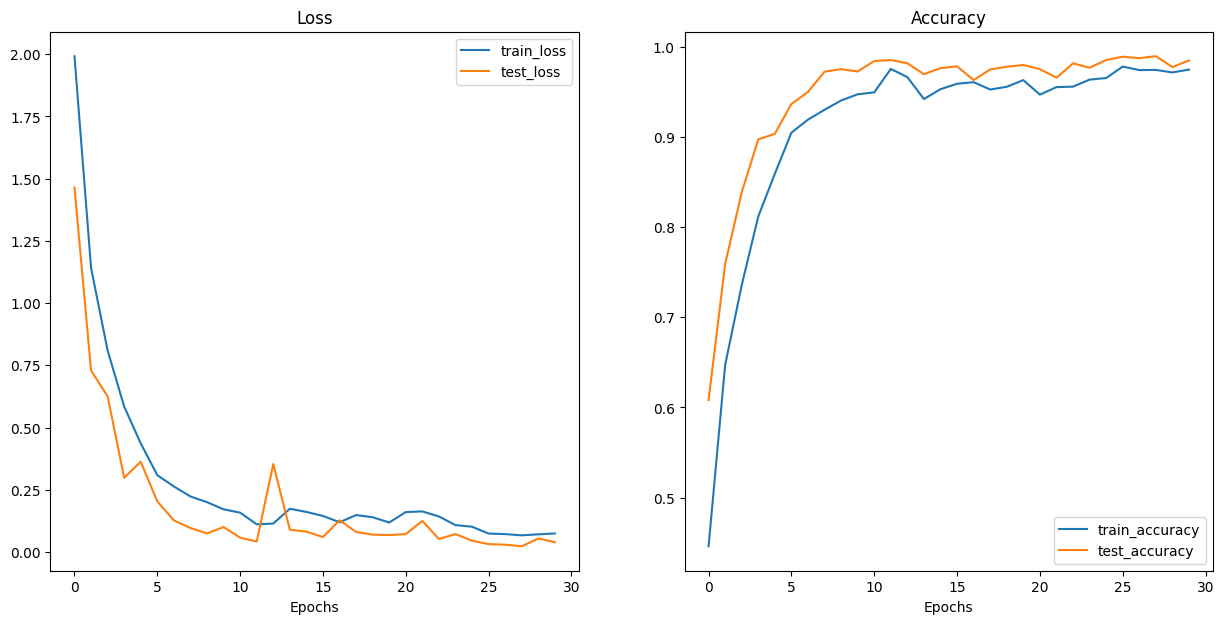

In [32]:
efficientNet_model_train=  train_model(efficientNet_model,train_DataLoader,test_DataLoader,efficientNet_model_optimizer,loss_func,30,1)
save_model(mobileNetLarge_model)
plot_loss_curves(efficientNet_model_train)

  0%|          | 0/30 [00:00<?, ?it/s]

Training
Testing
Epoch: 0 | train_loss: 1.8563 | train_acc: 0.4833 | test_loss: 1.6485 | test_acc: 0.5619
Training
Testing
Epoch: 1 | train_loss: 0.7110 | train_acc: 0.7706 | test_loss: 0.6843 | test_acc: 0.7890
Training
Testing
Epoch: 2 | train_loss: 0.4049 | train_acc: 0.8691 | test_loss: 0.7784 | test_acc: 0.8019
Training
Testing
Epoch: 3 | train_loss: 0.3464 | train_acc: 0.8982 | test_loss: 0.9615 | test_acc: 0.7858
Training
Testing
Epoch: 4 | train_loss: 0.2605 | train_acc: 0.9200 | test_loss: 0.2407 | test_acc: 0.9370
Training
Testing
Epoch: 5 | train_loss: 0.2169 | train_acc: 0.9303 | test_loss: 0.3233 | test_acc: 0.9073
Training
Testing
Epoch: 6 | train_loss: 0.2464 | train_acc: 0.9269 | test_loss: 1.3926 | test_acc: 0.7614
Training
Testing
Epoch: 7 | train_loss: 0.1896 | train_acc: 0.9403 | test_loss: 0.1933 | test_acc: 0.9313
Training
Testing
Epoch: 8 | train_loss: 0.1712 | train_acc: 0.9468 | test_loss: 0.2293 | test_acc: 0.9311
Training
Testing
Epoch: 9 | train_loss: 0.1849

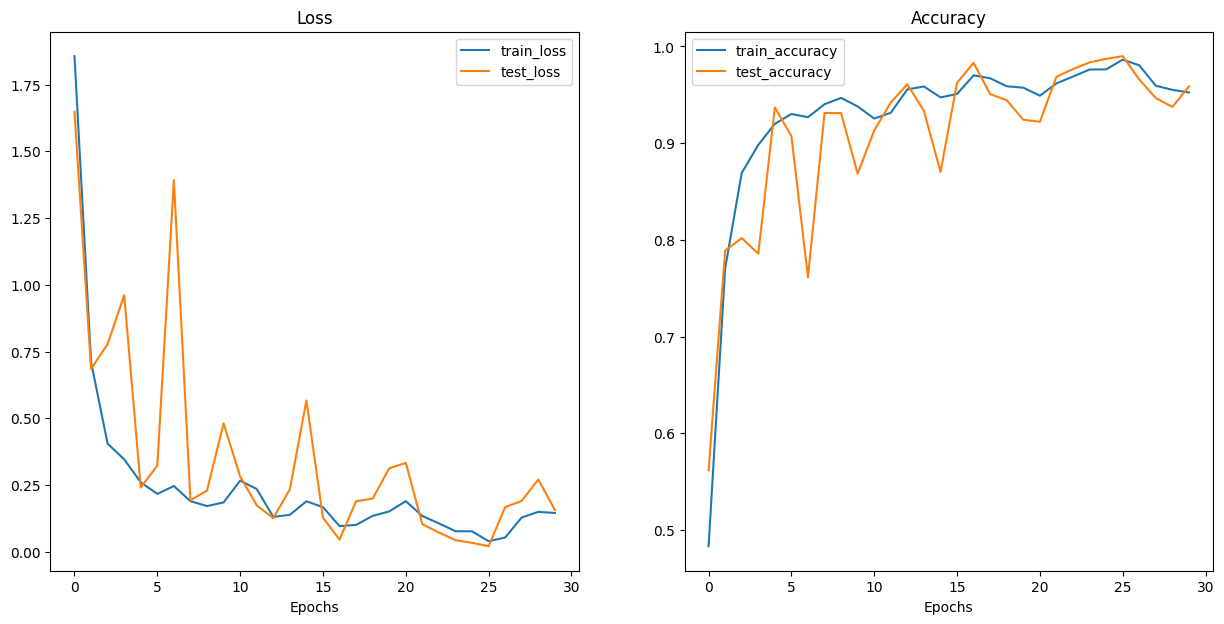

In [33]:
mobilenet_v3_large_train = train_model(mobileNetLarge_model,train_DataLoader,test_DataLoader,mobileNetLarge_optimizer,loss_func,30,1)
save_model(mobileNetLarge_model)
plot_loss_curves(mobilenet_v3_large_train)

  0%|          | 0/30 [00:00<?, ?it/s]

Training
Testing
Epoch: 0 | train_loss: 3.4262 | train_acc: 0.0503 | test_loss: 3.2248 | test_acc: 0.1003
Training
Testing
Epoch: 1 | train_loss: 3.1406 | train_acc: 0.1355 | test_loss: 2.9599 | test_acc: 0.1980
Training
Testing
Epoch: 2 | train_loss: 2.8260 | train_acc: 0.2470 | test_loss: 2.3905 | test_acc: 0.3786
Training
Testing
Epoch: 3 | train_loss: 2.1331 | train_acc: 0.4256 | test_loss: 1.3426 | test_acc: 0.7231
Training
Testing
Epoch: 4 | train_loss: 0.9932 | train_acc: 0.7373 | test_loss: 0.5161 | test_acc: 0.8833
Training
Testing
Epoch: 5 | train_loss: 0.5505 | train_acc: 0.8617 | test_loss: 0.3181 | test_acc: 0.9207
Training
Testing
Epoch: 6 | train_loss: 0.3470 | train_acc: 0.9190 | test_loss: 0.2580 | test_acc: 0.9407
Training
Testing
Epoch: 7 | train_loss: 0.3415 | train_acc: 0.9239 | test_loss: 0.2254 | test_acc: 0.9477
Training
Testing
Epoch: 8 | train_loss: 0.2769 | train_acc: 0.9439 | test_loss: 0.2263 | test_acc: 0.9481
Training
Testing
Epoch: 9 | train_loss: 0.2255

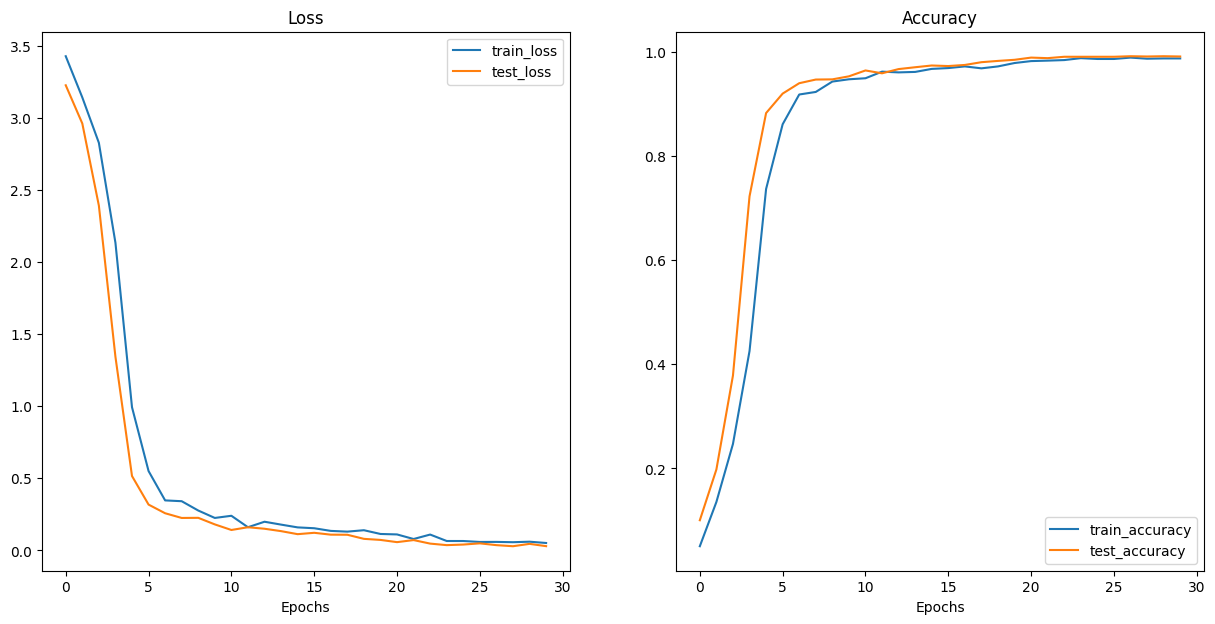

In [34]:
TinnyVGGModelV1_train = train_model(tinyVGG,train_DataLoader,test_DataLoader,tinnyVGG_optimizer,loss_func,30,1)
save_model(tinyVGG)
plot_loss_curves(TinnyVGGModelV1_train)

  0%|          | 0/30 [00:00<?, ?it/s]

Training
Testing
Epoch: 0 | train_loss: 3.4018 | train_acc: 0.0613 | test_loss: 3.2760 | test_acc: 0.0791
Training
Testing
Epoch: 1 | train_loss: 3.2255 | train_acc: 0.1072 | test_loss: 3.0921 | test_acc: 0.1602
Training
Testing
Epoch: 2 | train_loss: 2.9742 | train_acc: 0.1833 | test_loss: 2.7494 | test_acc: 0.2456
Training
Testing
Epoch: 3 | train_loss: 2.6046 | train_acc: 0.2732 | test_loss: 2.0818 | test_acc: 0.4393
Training
Testing
Epoch: 4 | train_loss: 1.9445 | train_acc: 0.4517 | test_loss: 1.3307 | test_acc: 0.6510
Training
Testing
Epoch: 5 | train_loss: 1.2290 | train_acc: 0.6415 | test_loss: 0.7225 | test_acc: 0.8132
Training
Testing
Epoch: 6 | train_loss: 0.7049 | train_acc: 0.7955 | test_loss: 0.4029 | test_acc: 0.8958
Training
Testing
Epoch: 7 | train_loss: 0.4381 | train_acc: 0.8683 | test_loss: 0.2742 | test_acc: 0.9262
Training
Testing
Epoch: 8 | train_loss: 0.2976 | train_acc: 0.9228 | test_loss: 0.1887 | test_acc: 0.9562
Training
Testing
Epoch: 9 | train_loss: 0.2248

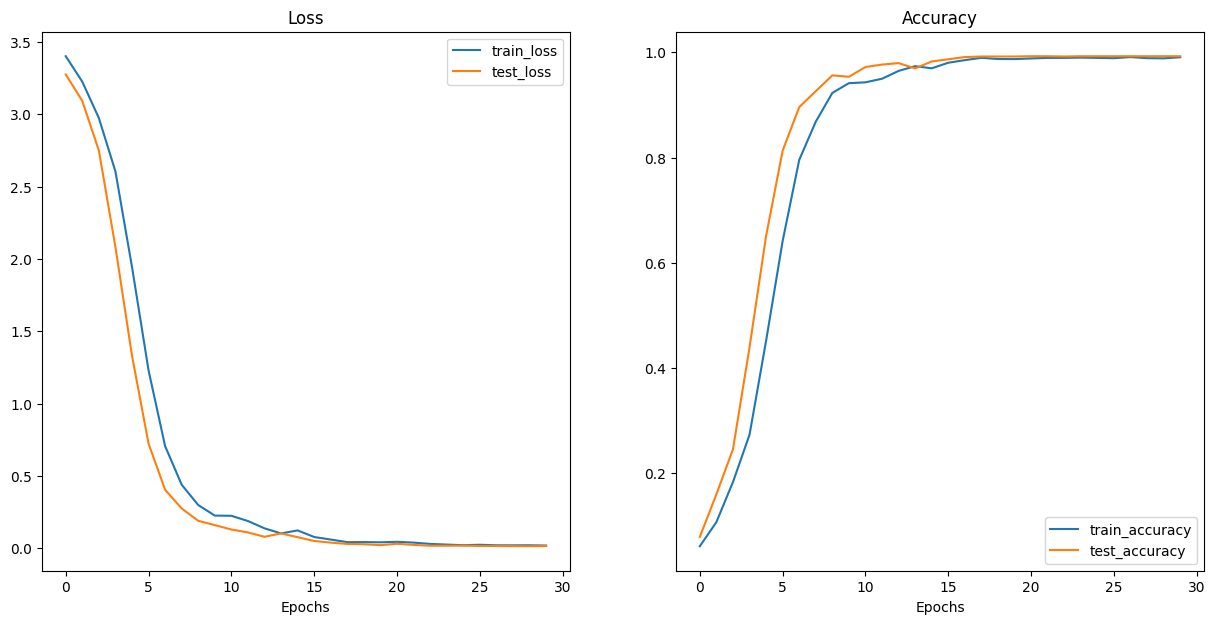

In [35]:
CustomCNN_results = train_model(CNN_model,train_DataLoader,test_DataLoader,CustomCNN_optimizer,loss_func,30,1)
save_model(CNN_model)
plot_loss_curves(CustomCNN_results)

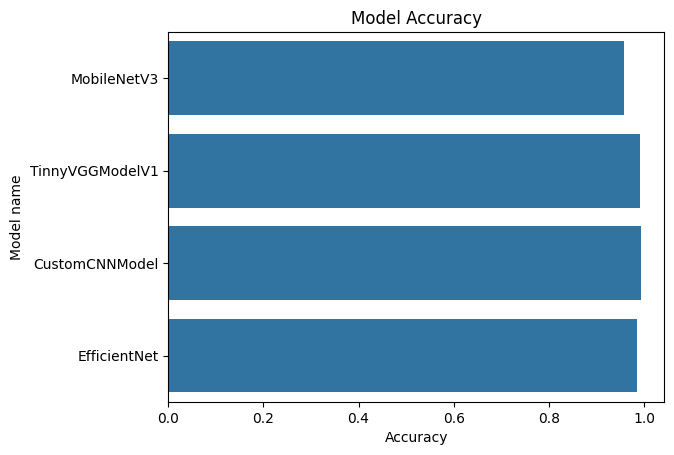

             Model      Loss       Acc
0      MobileNetV3  0.156924  0.958686
1  TinnyVGGModelV1  0.029914  0.992055
2   CustomCNNModel  0.014262  0.992585
3     EfficientNet  0.039707  0.984640
Ranking according to training time
   EfficientNet  MobileNetV3  TinnyVGGModelV1  CustomCNNModel
0    930.218567   507.979908       466.943932      467.972757


In [56]:
evaluate()

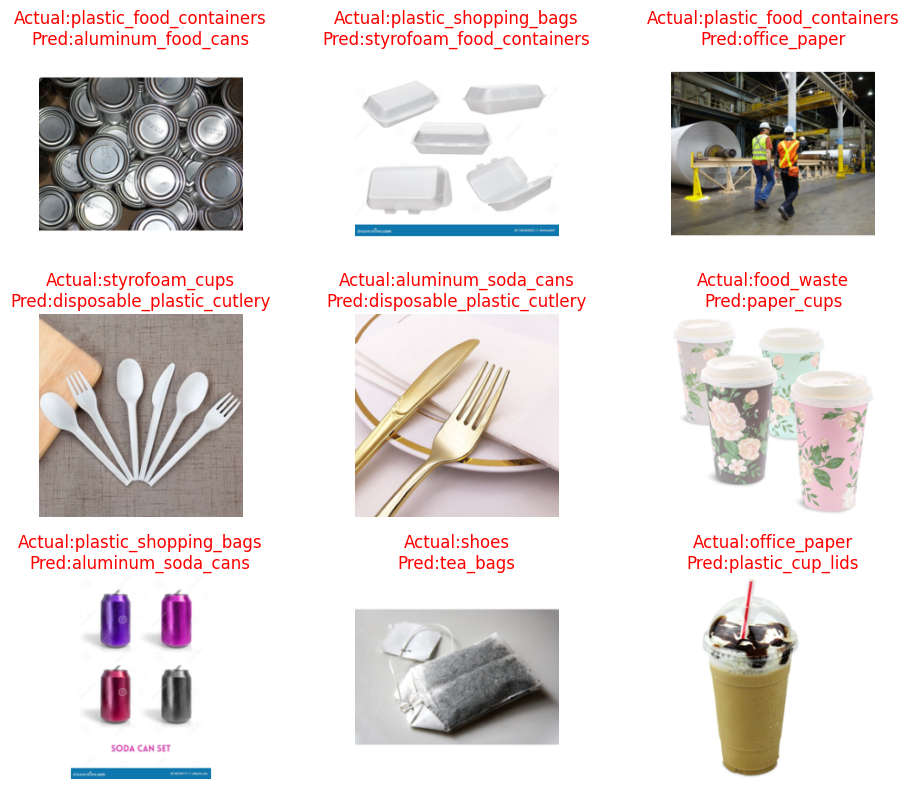


Classification Report:
                            precision    recall  f1-score   support

                 magazines       1.00      1.00      1.00         4
              office_paper       1.00      1.00      1.00         7
      plastic_soda_bottles       1.00      1.00      1.00         4
              aerosol_cans       1.00      1.00      1.00         3
                  clothing       1.00      1.00      1.00         2
        aluminum_food_cans       1.00      1.00      1.00         5
 styrofoam_food_containers       1.00      1.00      1.00         3
       cardboard_packaging       0.75      1.00      0.86         3
          plastic_cup_lids       1.00      1.00      1.00         6
                     shoes       1.00      1.00      1.00         3
           steel_food_cans       1.00      1.00      1.00         5
    glass_beverage_bottles       1.00      1.00      1.00         3
                food_waste       1.00      1.00      1.00         3
           cardboard_bo

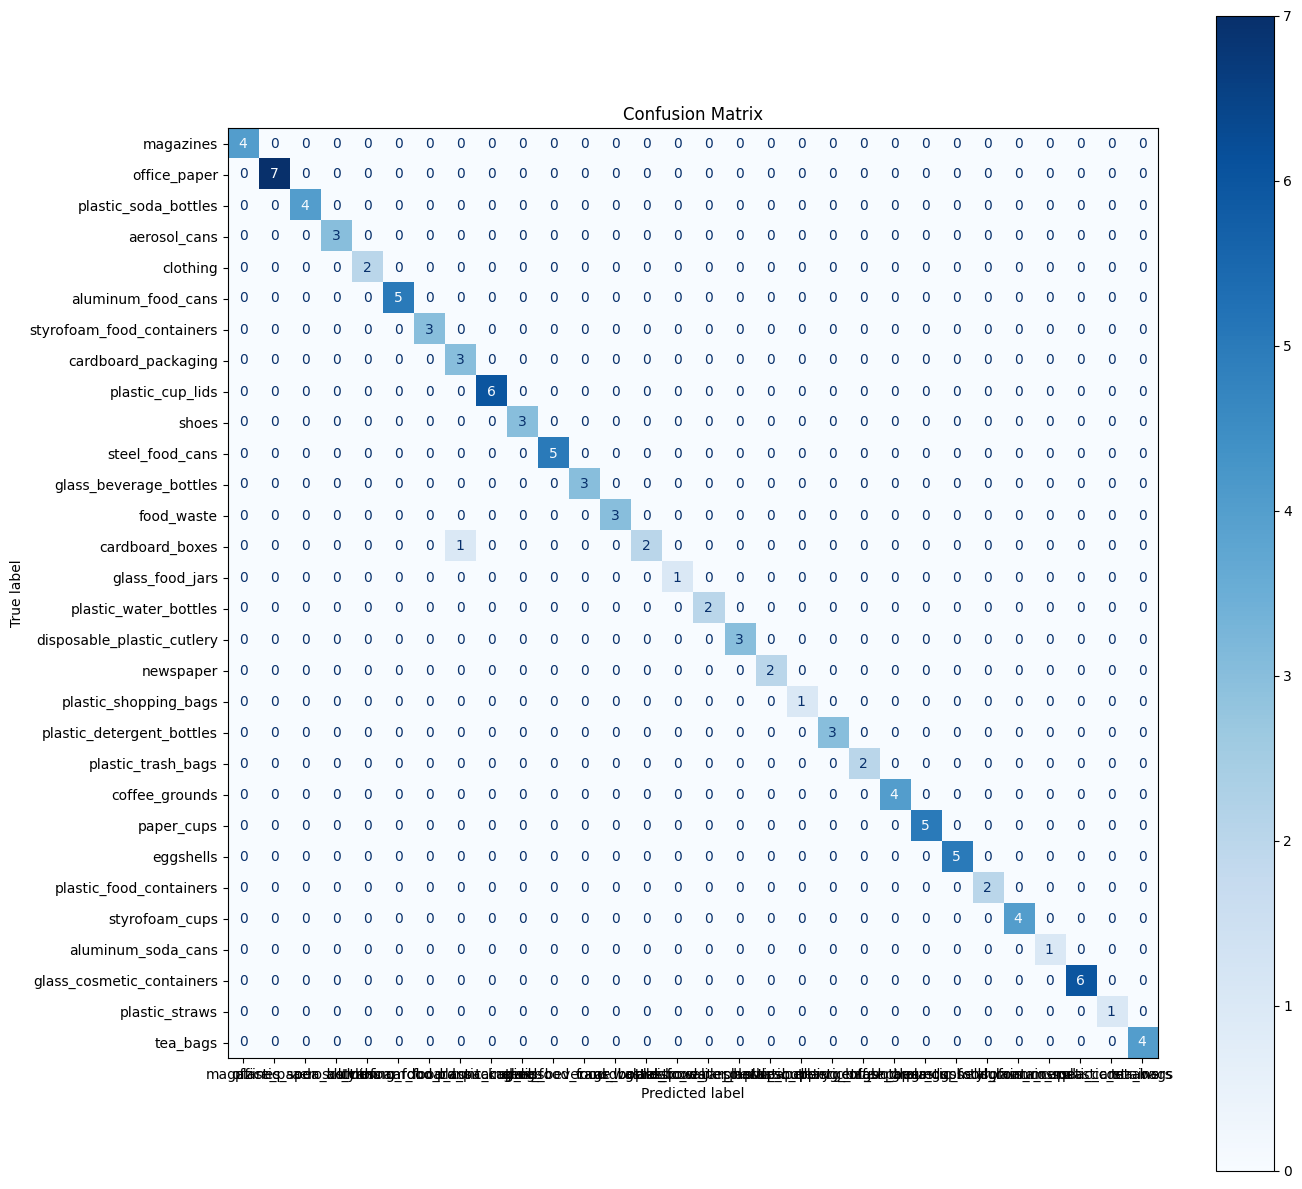

In [69]:
#Making predictions With the best Model
images, lables =image_label_lists(test_data, 9)
plot_(CNN_model,images,labels)
metrics(CNN_model,test_data,classes,100)